# 기본 통계량 구하기  

- 분포(distribution)와 관계없는 통계량
    - (단순)평균; (arithmetic)mean  
    $ 
\begin{align} 
    \bar{X} \, or \, E[X]  &= \frac{1}{n} (X_1 + X_2 + \cdots + X_n) \nonumber \\
     &= \frac{1}{n} \sum_{i=1}^{n} X_i \nonumber  
\end{align}
$
    - 분산; variance  
        $ \begin{align} 
            \sigma_X^2 \, or \, Var(X) &= E[(X-E[X])^2] \nonumber \\
            &= \frac{1}{n} \sum_{i=1}^{n} (X_i - E[X])^2 \nonumber
        \end{align} $
          
        [Unbiased sample variance](https://en.wikipedia.org/wiki/Variance#Unbiased_sample_variance):  
        $ \begin{align} 
            s_X^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - E[X])^2 \nonumber
        \end{align} $


    - 표준편차; standard deviation (unbiased)  
        $ \begin{align} 
            s_X &= \sqrt{s_X^2} \nonumber
        \end{align} $


## (단순)평균

In [1]:
(1.5 + 3.2 + 5.8 + 7.1 + 2.4 + 4.9 + 6.5 + 8.2 + 0.9) / 9

4.499999999999999

[np.mean()](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [2]:
import numpy as np

# 샘플 데이터 생성
data = np.array([1.5, 3.2, 5.8, 7.1, 2.4, 4.9, 6.5, 8.2, 0.9])
data

array([1.5, 3.2, 5.8, 7.1, 2.4, 4.9, 6.5, 8.2, 0.9])

In [3]:
# 갯수
len(data)

9

In [4]:
# 평균값
np.mean(data)

4.499999999999999

In [5]:
# 최대값 최소값
print(np.max(data), np.min(data))

8.2 0.9


[np.nanmean()](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) 결측값을 무시함

In [6]:
# 12개 요소를 가진 샘플 데이터 생성, 일부 값은 NaN으로 설정
# NaN은 missing value (결측값)
data_missing = np.array([1.5, 3.2, np.nan, 5.8, 7.1, np.nan, 2.4, 4.9, 6.5, 8.2, 0.9, np.nan])
data_missing

array([1.5, 3.2, nan, 5.8, 7.1, nan, 2.4, 4.9, 6.5, 8.2, 0.9, nan])

In [7]:
# np.mean(), max(), min()은 결측값이 있는 경우, 제대로 동작하지 않음
print(np.max(data_missing), np.min(data_missing))
np.mean(data_missing)

nan nan


nan

In [8]:
# np.nanmean()은 오류없이 결측값을 무시한 값을 출력
np.nanmean(data_missing)

4.499999999999999

In [9]:
# np.nanmax()와 nanmin()역시 결측값을 무시한 값을 출력
print(np.nanmax(data_missing), np.nanmin(data_missing))

8.2 0.9


In [10]:
# len()함수는 결측값도 세아리기 때문에 인덱스를 사용하여야 함
print(len(data_missing))
len(data_missing[~np.isnan(data_missing)]) 

12


9

## 분산

In [11]:
mean = (1.5 + 3.2 + 5.8 + 7.1 + 2.4 + 4.9 + 6.5 + 8.2 + 0.9) / 9
((1.5-mean)**2 + (3.2-mean)**2 + (5.8-mean)**2 + (7.1-mean)**2 + (2.4-mean)**2 + (4.9-mean)**2 + (6.5-mean)**2 + (8.2-mean)**2 + (0.9-mean)**2) / 8

6.794999999999999

[np.var()](https://numpy.org/doc/stable/reference/generated/numpy.var.html)

In [12]:
# 일반 분산
np.var(data, 
        # 자유도 조정
        ddof=1)

6.794999999999999

In [13]:
np.var(data_missing, 
        # 자유도 조정
        ddof=1)

nan

[np.nanvar()](https://numpy.org/doc/stable/reference/generated/numpy.nanvar.html)

In [14]:
# NaN 값을 무시하고 분산 계산
np.nanvar(data_missing, 
            # 자유도 조정
            ddof=1)

6.794999999999999

In [15]:
# 자유도 조정을 하지 않는다면?
print('DoF adjusted',np.nanvar(data_missing, 
            # 자유도 조정
            ddof=1),
       '\nDoF not adjusted',
        np.nanvar(data_missing, 
            # 자유도 조정
            ddof=0))

DoF adjusted 6.794999999999999 
DoF not adjusted 6.039999999999999


## 표준편차

[np.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

In [16]:
# 일반 표준편차
np.std(data,
        # 자유도 조정
        ddof=1)

2.606722079547415

In [17]:
np.std(data_missing,
        # 자유도 조정
        ddof=1)

nan

[np.nanstd()](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html)

In [18]:
# NaN 값을 무시하고 표준편차 계산
np.nanstd(data_missing,
            # 자유도 조정
            ddof=1)


2.606722079547415

In [19]:
# 자유도 조정을 하지 않는다면?
print('DoF adjusted',np.nanstd(data_missing, 
            # 자유도 조정
            ddof=1),
       '\nDoF not adjusted',
        np.nanstd(data_missing, 
            # 자유도 조정
            ddof=0))

DoF adjusted 2.606722079547415 
DoF not adjusted 2.4576411454889016


#### 불러온 데이터의 기초통계량
1978년 CPS (Current Population Survey)데이터  

In [20]:
import pandas as pd
import numpy as np

# 소수점 설정
pd.options.display.float_format = "{:,.1f}".format

# CSV 파일 불러오기
df_cps = pd.read_csv(r'https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv')
# df_cps = df_cps.loc[df_cps['date'] == '2023-03-01'].reset_index(drop=True)
print('CPS 1978 data: https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv \n',df_cps.dtypes)
df_cps

CPS 1978 data: https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv 
 Unnamed: 0           int64
income_78          float64
edu_year             int64
age                  int64
edu_level           object
income_at_23       float64
ln_income_at_23    float64
dtype: object


,Unnamed: 0,income_78,edu_year,age,edu_level,income_at_23,ln_income_at_23
0,0,"9,930.0",11,37,Secondary,"46,406.2",10.7
1,1,"3,595.9",9,22,Secondary,"16,804.7",9.7
2,2,"24,909.5",12,30,Secondary,"116,409.6",11.7
3,3,"7,506.1",11,27,Secondary,"35,078.6",10.5
4,4,289.8,8,33,Secondary,"1,354.3",7.2
...,...,...,...,...,...,...,...
13955,13955,"2,757.4",12,22,Secondary,"12,886.4",9.5
13956,13956,"6,895.1",12,20,Secondary,"32,222.8",10.4
13957,13957,"4,221.9",12,37,Secondary,"19,730.1",9.9
13958,13958,"13,671.9",9,47,Secondary,"63,893.2",11.1


In [21]:
# 임금평균 - 1978 raw 데이터
np.mean(df_cps['income_78'])

17091.860533111245

In [22]:
# 임금 표준편차 - 1978 raw 데이터
np.std(df_cps['income_78'])

8266.749366702066

## 정규분포와 쌍둥이들 - 자연스러운 확률?!
- (거의) 모든것이 정규분포가 된다? 중심극한정리; the central limit theorem  
[![3b1b_clt](https://i.ytimg.com/an_webp/SoKjCUcDBf0/mqdefault_6s.webp?du=3000&sqp=CImfwa8G&rs=AOn4CLCyCJ_NyBmIDv_PIv-mhxoD2Xw4Sg)](https://www.youtube.com/watch?v=SoKjCUcDBf0)  
- 정규분포  
[![statquest_normal](https://i.ytimg.com/vi/rzFX5NWojp0/hqdefault.jpg?sqp=-oaymwEcCNACELwBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLCKnTAtZLuIfqY6Rp_SaAAWLvpFig)](https://www.youtube.com/watch?v=rzFX5NWojp0&t=13)




#### 정규분포에서 평균과 분산의 역할

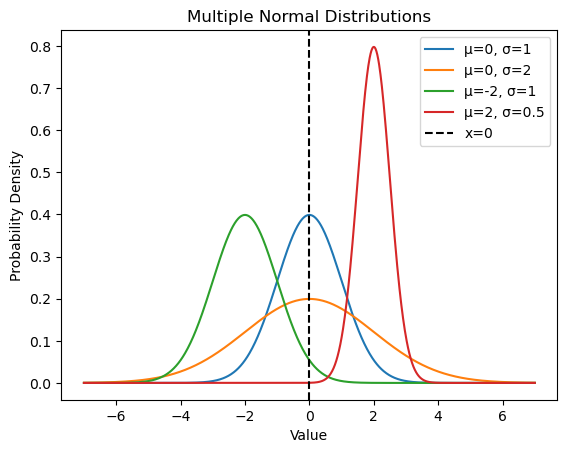

In [23]:
def normal_dist_draw(distributions):
    import matplotlib.pyplot as plt
    import numpy as np
    import scipy.stats as stats
    # Generate x values
    x = np.linspace(-7, 7, 1000)
    # Plot each distribution
    for dist in distributions:
        y = stats.norm.pdf(x, dist['mean'], dist['std'])
        plt.plot(x, y, label=f"{dist['label']}")
    # Adding labels and legend
    plt.axvline(x=0, color='k', linestyle='--', label='x=0')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title('Multiple Normal Distributions')
    plt.legend()
    # Show plot
    plt.show()
# 

distributions = [
    {'mean': 0, 'std': 1, 'label': 'μ=0, σ=1'},
    {'mean': 0, 'std': 2, 'label': 'μ=0, σ=2'},
    {'mean': -2, 'std': 1, 'label': 'μ=-2, σ=1'},
    {'mean': 2, 'std': 0.5, 'label': 'μ=2, σ=0.5'}
]
normal_dist_draw(distributions)

#### 표준정규분포화

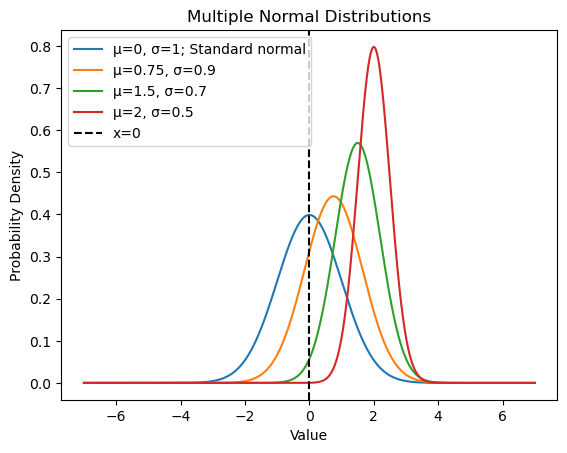

In [24]:
distributions = [
    {'mean': 0, 'std': 1, 'label': 'μ=0, σ=1; Standard normal'},
    {'mean': 0.75, 'std': 0.9, 'label': 'μ=0.75, σ=0.9'},
    {'mean': 1.5, 'std': 0.7, 'label': 'μ=1.5, σ=0.7'},
    {'mean': 2, 'std': 0.5, 'label': 'μ=2, σ=0.5'}
]

normal_dist_draw(distributions)

#### 표준정규분포

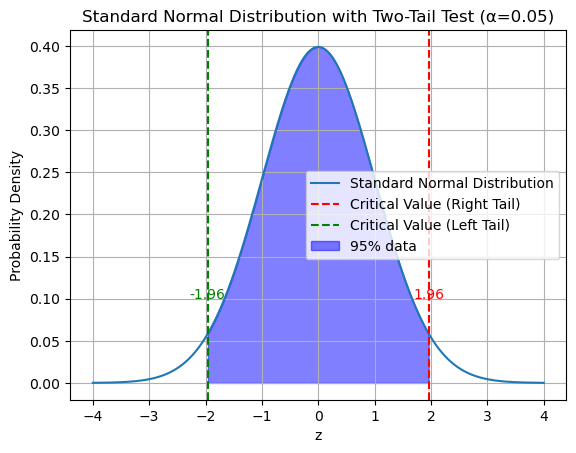

In [25]:
def draw_cv_conf(alpha):
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    # Standard normal distribution parameters
    mu = 0  # mean
    sigma = 1  # standard deviation
    # Create a range of x values
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    # The y values corresponding to the standard normal pdf
    y = stats.norm.pdf(x, mu, sigma)
    # Plot the standard normal distribution
    plt.plot(x, y, label='Standard Normal Distribution')
    # Critical values for two-tailed test at alpha level
    critical_value_right = stats.norm.ppf(1 - alpha / 2)
    critical_value_left = stats.norm.ppf(alpha / 2)
    # Plot the critical values
    plt.axvline(critical_value_right, color='r', linestyle='--', label='Critical Value (Right Tail)')
    plt.axvline(critical_value_left, color='g', linestyle='--', label='Critical Value (Left Tail)')
    # Labeling the critical values
    plt.text(critical_value_right, 0.1, f'{critical_value_right:.2f}', horizontalalignment='center', color='red')
    plt.text(critical_value_left, 0.1, f'{critical_value_left:.2f}', horizontalalignment='center', color='green')
    # Fill between for the two-tail areas
    plt.fill_between(x, y, where=(x > critical_value_left) & (x < critical_value_right), color='blue', alpha=0.5, label=f'{(1-alpha):.00%} data')
    # Additional plot formatting
    plt.xlabel('z')
    plt.ylabel('Probability Density')
    plt.title('Standard Normal Distribution with Two-Tail Test (α={alpha})'.format(alpha=alpha))
    plt.legend()
    plt.grid(True)
    plt.show()
# 

draw_cv_conf(alpha=0.05)

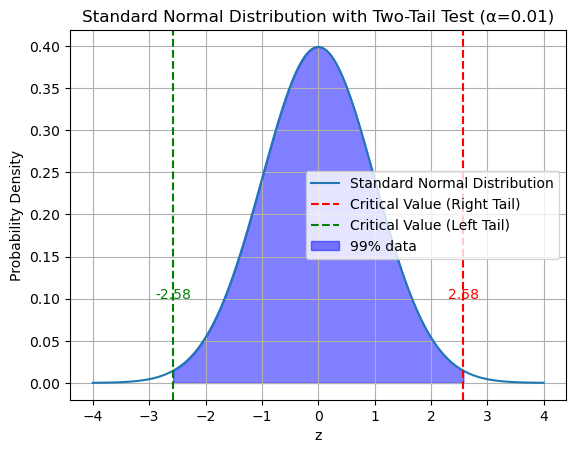

In [26]:
draw_cv_conf(alpha=0.01)

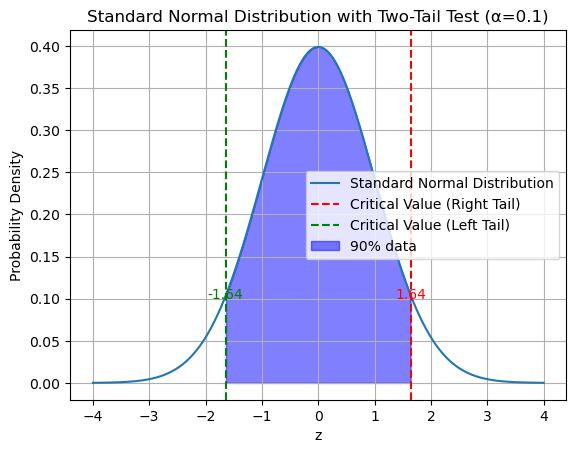

In [27]:
draw_cv_conf(alpha=0.1)

#### 표준정규분포를 이용해서 정규분포의 신뢰구간 찾기

Total observation:1000 
95% observation are in [4.02, 7.95] 
	number of observation: 949, 94.90%


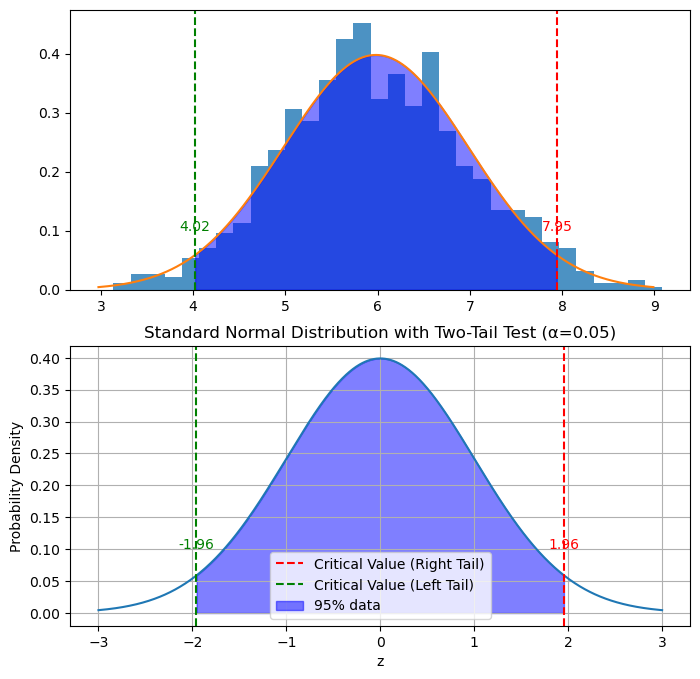

In [28]:
def draw_standardization(data, alpha) :
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    mu = np.nanmean(data)
    sigma = np.nanstd(data)
    n = len(data[~np.isnan(data)])
    # Alpha level for two-tailed test
    # alpha = 0.05
    # 
    fig, axe = plt.subplots(2,1, figsize=(8,8))
    # ax = plt.hist((data-np.mean(data))/np.std(data), bins=round(np.sqrt(n)), density=True, alpha=0.8)
    for idx, ax in enumerate(axe) :
        # print(idx)
        if idx == 0 :
            ax.hist(data, bins=min(round(np.sqrt(n)),50), density=True, alpha=0.8)
        elif idx == 1 :
            mu = np.mean((data-np.mean(data))/np.std(data))  # Mean
            sigma = np.std((data-np.mean(data))/np.std(data))  # Standard deviation
        else :
            continue
        # Parameters for the standard normal distribution
        # Generate points on the x axis between -4 and 4:
        x = np.linspace((mu-3*sigma), (mu+3*sigma), 1000)
        # Calculate the normal distribution's PDF at these points:
        y = stats.norm.pdf(x, mu, sigma)
        ax.plot(x, y)
        # Critical values for two-tailed test at alpha level
        critical_value_right = mu + stats.norm.ppf(1 - alpha / 2) * sigma
        critical_value_left  = mu + stats.norm.ppf(alpha / 2) * sigma
        # Plot the critical values
        ax.axvline(critical_value_right, color='r', linestyle='--', label='Critical Value (Right Tail)')
        ax.axvline(critical_value_left, color='g', linestyle='--', label='Critical Value (Left Tail)')
        # Labeling the critical values
        ax.text(critical_value_right, 0.1, f'{critical_value_right:.2f}', horizontalalignment='center', color='red')
        ax.text(critical_value_left, 0.1, f'{critical_value_left:.2f}', horizontalalignment='center', color='green')
        # Fill between for the two-tail areas
        ax.fill_between(x, y, where=(x > critical_value_left) & (x < critical_value_right), 
        color='blue', alpha=0.5, label=f'{(1-alpha):.00%} data')
        if idx == 0 :
            print(f'Total observation:{n} \n95% observation are in [{critical_value_left:.2f}, {critical_value_right:.2f}] \n\tnumber of observation: {len(data[(data>=critical_value_left)&(data<=critical_value_right)])}, {len(data[(data>=critical_value_left)&(data<=critical_value_right)])/len(data):.2%}')
    plt.xlabel('z')
    plt.ylabel('Probability Density')
    plt.title('Standard Normal Distribution with Two-Tail Test (α={alpha})'.format(alpha=alpha))
    plt.legend()
    plt.grid(True)
    plt.show()



mu = 6  # Mean
sigma = 1  # Standard deviation
n = 1000
alpha = 0.05
data = np.random.normal(loc=mu, scale=sigma,size=n)
draw_standardization(data, alpha)

Total observation:1000 
95% observation are in [8.35, 11.64] 
	number of observation: 903, 90.30%


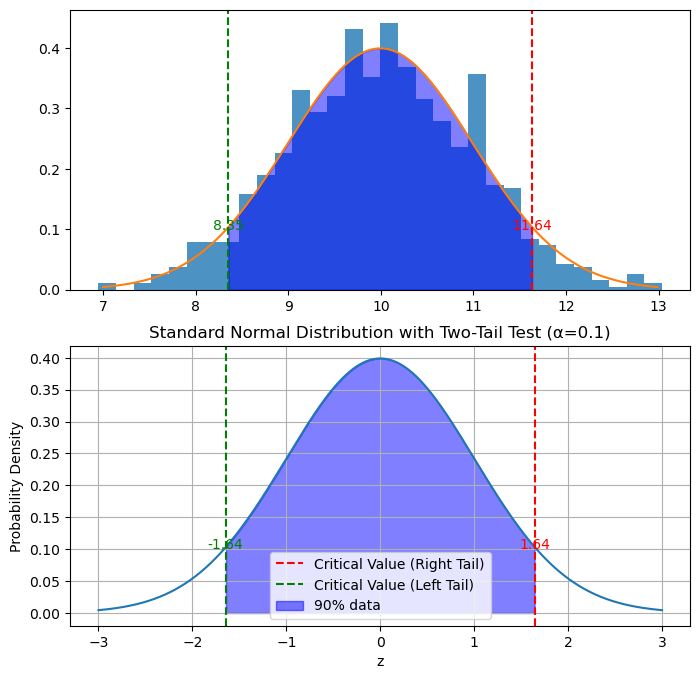

In [29]:
mu = 10  # Mean
sigma = 1  # Standard deviation
n = 1000
alpha = 0.1
data = np.random.normal(loc=mu, scale=sigma,size=n)
draw_standardization(data, alpha)

<!-- ### Confidence interval (신뢰구간)  

Student's t 분포
![t-stat](https://www.scribbr.com/wp-content/uploads/2020/08/diff_scores_ci.png)


$ [E[X] - {critical \, value}_{\alpha=0.975}  \frac{\sigma_X}{\sqrt{obs}}, \quad E[X] + {critical \, value}_{\alpha=0.975}  \frac{\sigma_X}{\sqrt{obs}}] $ -->

<!-- import scipy.stats as st

#create 95% confidence interval for population mean weight
st.t.interval(
    # 유의수준
    confidence=0.90, 
    # 자유도 = N-1
    df=len(data[~np.isnan(data)])-1, 
    # 평균
    loc=np.nanmean(data), 
    # 표준편차
    scale=np.nanstd(data)) 
st.t.ppf(0.1, len(data[~np.isnan(data)])-1) -->

# 데이터의 분포확인하기 - 히스토그램

In [30]:
import pandas as pd
import numpy as np

# 소수점 설정
pd.options.display.float_format = "{:,.1f}".format

# CSV 파일 불러오기
df_cps = pd.read_csv(r'https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv')
# df_cps = df_cps.loc[df_cps['date'] == '2023-03-01'].reset_index(drop=True)
print('CPS 1978 data: https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv \n',df_cps.dtypes)
df_cps

CPS 1978 data: https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv 
 Unnamed: 0           int64
income_78          float64
edu_year             int64
age                  int64
edu_level           object
income_at_23       float64
ln_income_at_23    float64
dtype: object


,Unnamed: 0,income_78,edu_year,age,edu_level,income_at_23,ln_income_at_23
0,0,"9,930.0",11,37,Secondary,"46,406.2",10.7
1,1,"3,595.9",9,22,Secondary,"16,804.7",9.7
2,2,"24,909.5",12,30,Secondary,"116,409.6",11.7
3,3,"7,506.1",11,27,Secondary,"35,078.6",10.5
4,4,289.8,8,33,Secondary,"1,354.3",7.2
...,...,...,...,...,...,...,...
13955,13955,"2,757.4",12,22,Secondary,"12,886.4",9.5
13956,13956,"6,895.1",12,20,Secondary,"32,222.8",10.4
13957,13957,"4,221.9",12,37,Secondary,"19,730.1",9.9
13958,13958,"13,671.9",9,47,Secondary,"63,893.2",11.1


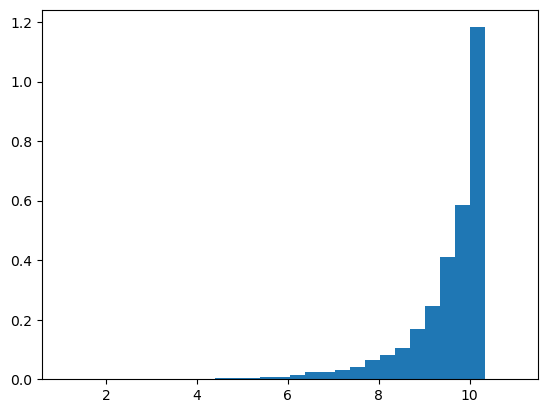

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(np.log(df_cps['income_78']), bins=30, density=True)
plt.show()

In [32]:
import pandas as pd
import numpy as np

# 소수점 설정
pd.options.display.float_format = "{:,.1f}".format

# CSV 파일 불러오기
df_hps = pd.read_csv(r'https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/KOSIS_houshold_panel_survey/data_income_kor.csv')
df_hps = df_hps.loc[df_hps['date'] == '2023-03-01'].reset_index(drop=True)
print(df_hps.dtypes)
df_hps

Unnamed: 0      int64
date           object
id              int64
household        bool
female           bool
age           float64
income        float64
edu_year        int64
ln_income     float64
dtype: object


,Unnamed: 0,date,id,household,female,age,income,edu_year,ln_income
0,0,2023-03-01,1,True,False,43.0,"5,170,000.0",12,15.5
1,1,2023-03-01,2,True,False,66.0,"2,176,800.0",9,14.6
2,2,2023-03-01,4,True,True,50.0,"2,078,090.0",12,14.5
3,3,2023-03-01,5,True,False,30.0,"700,514.0",14,13.5
4,4,2023-03-01,6,True,True,65.0,"895,976.0",12,13.7
...,...,...,...,...,...,...,...,...,...
5390,17734,2023-03-01,6717,False,True,46.0,"3,079,500.0",12,14.9
5391,17735,2023-03-01,6732,False,True,42.0,"1,292,320.0",14,14.1
5392,17736,2023-03-01,6735,False,True,48.0,"1,520,800.0",14,14.2
5393,17737,2023-03-01,6744,False,True,50.0,"1,346,473.0",12,14.1


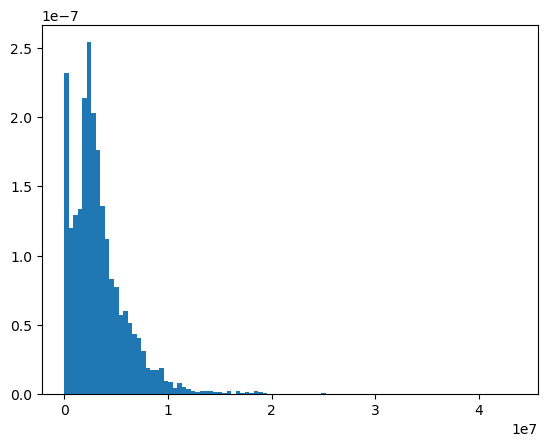

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(df_hps['income'], bins=100, density=True)
plt.show()

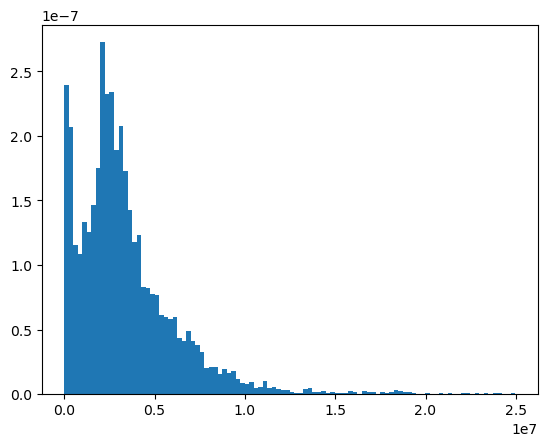

In [34]:
fig, ax = plt.subplots()
ax.hist(df_hps['income'].loc[df_hps['income']<25000000], bins=100, density=True)
plt.show()

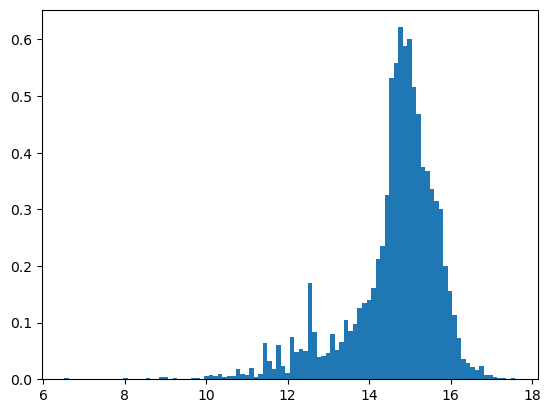

In [35]:
fig, ax = plt.subplots()
ax.hist(df_hps['ln_income'], bins=100, density=True)
plt.show()

Total observation:5395 
95% observation are in [12.42, 16.81] 
	number of observation: 5064, 93.86%


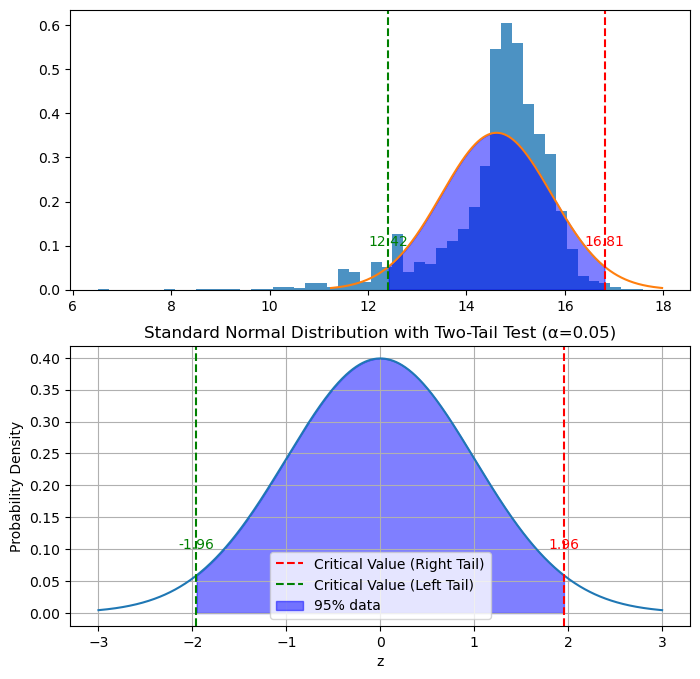

In [36]:
draw_standardization(df_hps['ln_income'], alpha=0.05)